In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [13]:

# Load the CSV
station_file = '~/data/gsod/isd-history.csv'
df = pd.read_csv(station_file)

# Filter for Philippine stations only
df_ph = df[df['CTRY'] == 'RP'].copy()

# Quick check: print number of rows and sample
print(f"Number of Philippine stations: {len(df_ph)}")
print(df_ph.head())

# Optional: save filtered list if needed
df_ph.to_csv('isd-history-ph.csv', index=False)


Number of Philippine stations: 116
         USAF   WBAN      STATION NAME CTRY STATE ICAO     LAT      LON  \
14685  691764  99999        CLARK INTL   RP   NaN  NaN  15.183  120.567   
14695  691854  99999          VILLAMOR   RP   NaN  NaN  14.517  121.017   
14710  692004  99999  EDWIN ANDREWS AB   RP   NaN  NaN   6.933  122.067   
15044  697054  99999          TACLOBAN   RP   NaN  NaN  11.233  125.033   
15052  697134  99999            ILOILO   RP   NaN  NaN  10.717  122.533   

       ELEV(M)     BEGIN       END  
14685    148.0  19850311  20030611  
14695     23.0  19830314  20001020  
14710     10.1  19770313  20010822  
15044      3.0  19840823  19991227  
15052      8.0  19840322  20020525  


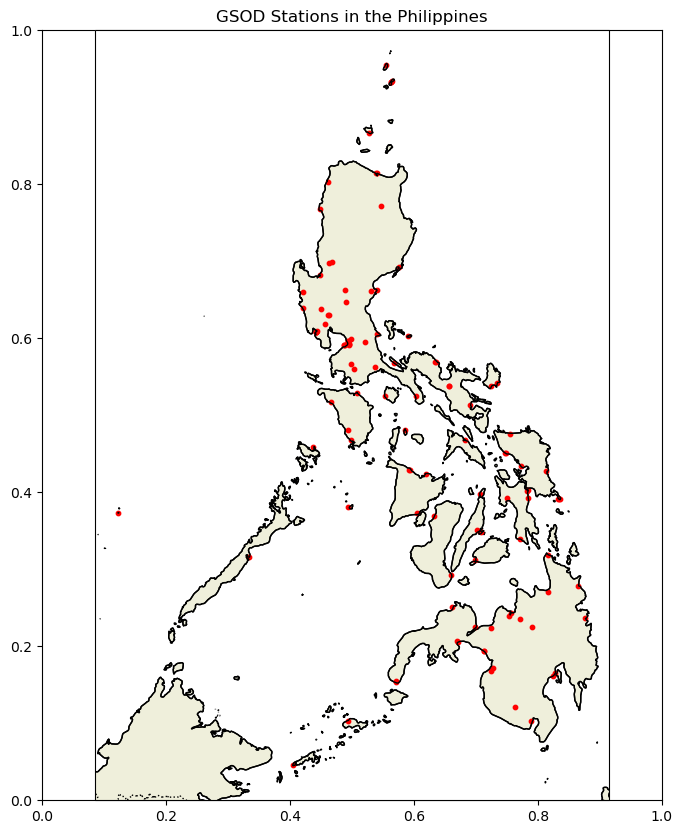

In [10]:
# Create geometry column
geometry = [Point(xy) for xy in zip(df_ph['LON'], df_ph['LAT'])]
gdf = gpd.GeoDataFrame(df_ph, geometry=geometry)



# Plot
fig, ax = plt.subplots(figsize=(8, 10))

ax = plt.axes(projection=ccrs.PlateCarree())
gdf.plot(ax=ax, color='red', markersize=10)
# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.set_title('GSOD Stations in the Philippines')
plt.show()

In [14]:
import pandas as pd

# Replace with your actual output path
file_path = './gsod_ph_cleaned/2020_98427099999.parquet'

df_check = pd.read_parquet(file_path)

# Preview rows
print(df_check.head())

# Check columns and data types
print(df_check.info())


       STATION       DATE   LATITUDE  LONGITUDE  ELEVATION         NAME  TEMP  \
0  98427099999 2020-01-01  14.016667      121.6      158.0  TAYABAS, RP  77.0   
1  98427099999 2020-01-02  14.016667      121.6      158.0  TAYABAS, RP  77.8   
2  98427099999 2020-01-03  14.016667      121.6      158.0  TAYABAS, RP  77.8   
3  98427099999 2020-01-04  14.016667      121.6      158.0  TAYABAS, RP  76.7   
4  98427099999 2020-01-05  14.016667      121.6      158.0  TAYABAS, RP  77.2   

   TEMP_ATTRIBUTES  DEWP  DEWP_ATTRIBUTES  ...   SNDP  FRSHTT     TEMP_C  \
0                8  74.4                8  ...  999.9   10000  25.000000   
1                8  72.6                8  ...  999.9   10000  25.444444   
2                8  70.6                8  ...  999.9       0  25.444444   
3                8  71.8                8  ...  999.9   10000  24.833333   
4                8  69.9                8  ...  999.9       0  25.111111   

      DEWP_C  MAX_C      MIN_C  PRCP_mm   WDSP_ms  MXSPD